In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes

In [2]:
def f(x):
    return np.sin(x)

def f_p(x):
    dx = x[1] - x[0]
    return (f(x)[1:] - f(x)[:-1])/dx

def f_pp(x):
    dx = x[1] - x[0]
    return (f_p(x)[1:] - f_p(x)[:-1])/dx

In [3]:
x = np.linspace(0, 2*np.pi, 200, endpoint=True)
func = f(x)
func_p = f_p(x)
func_pp = f_pp(x)
plot_f = np.array([func, func_p, func_pp], dtype=object)

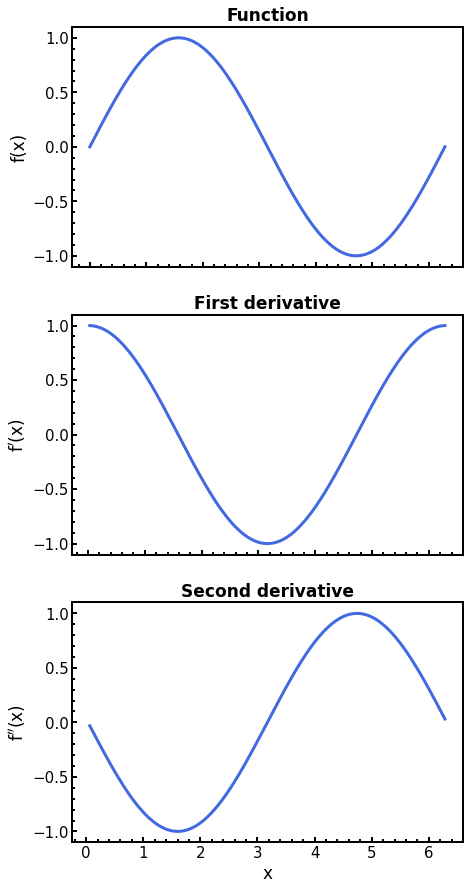

In [4]:
nrows=3
fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(7,15))
title = ['Function', 'First derivative', 'Second derivative']
y_label = ['f(x)', r'f$^\prime$(x)', r'f$^{\prime\prime}$(x)']


for i in range(nrows):
    
    ax = axs[i]
    ax.plot(x[i:], plot_f[i], color='royalblue', linewidth=3)
    ax.set_title(title[i], fontsize=17, weight='bold')
    ax.set_ylabel(y_label[i], fontsize=17)
    if i==nrows-1:
        ax.set_xlabel('x', fontsize=17) 
        
    spines = ['left', 'bottom', 'top', 'right']
    for spine in spines:
        ax.spines[spine].set_linewidth(2)
            
    ax.tick_params(direction='in', which='major', labelsize=15, length=5, width=2)
    ax.minorticks_on()
    ax.tick_params(direction='in', which='minor', labelsize=15, length=3, width=2)
    if i!=nrows-1:
        ax.xaxis.set_ticklabels([])


## Q2: Planetary positions

Text(0.5, 1.0, 'Solar system planets')

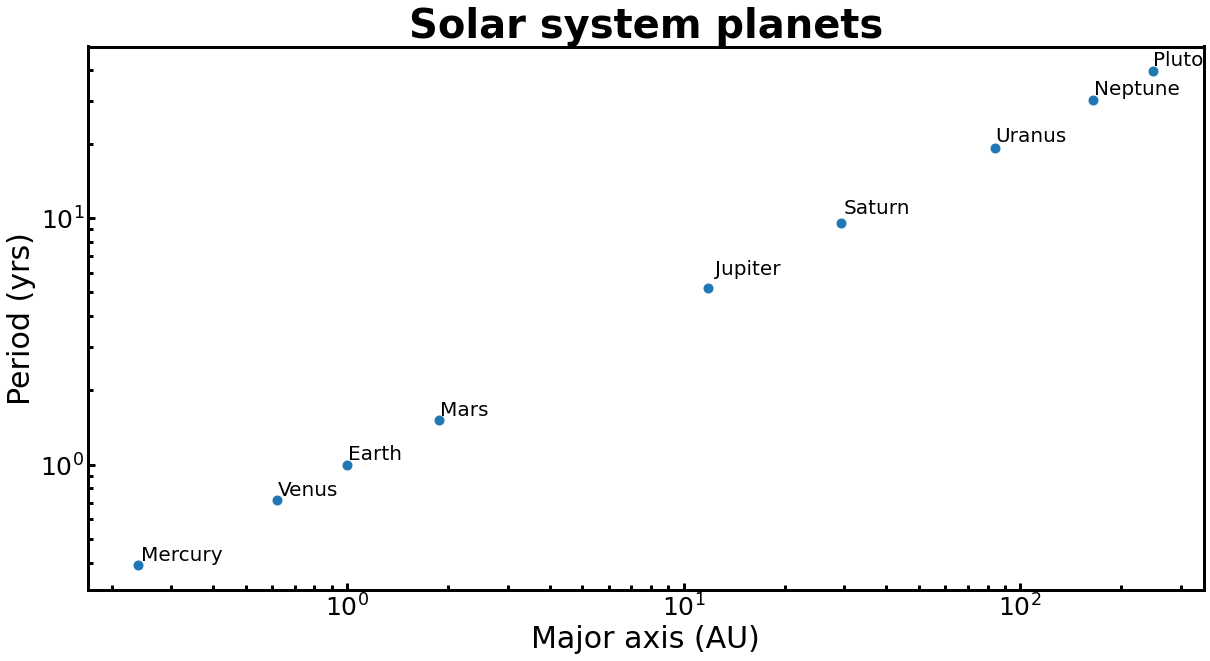

In [5]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,10))

ax.plot(P,a,ls='',marker='o', markersize=9)
    
dist = [0.005, 0.005, 0.01, 0.01, 0.5, 0.5, 0.5, 0.7, 0.7]
for i, name in enumerate(names):
    ax.text(P[i]+dist[i], a[i]+dist[i], names[i], fontsize=20, ha='left', va='bottom')

ax.set_xlabel('Major axis (AU)', fontsize=30)
ax.set_ylabel('Period (yrs)', fontsize=30)
ax.set_yscale('log')
ax.set_xscale('log')
spines = ['left', 'bottom', 'top', 'right']
for spine in spines:
    ax.spines[spine].set_linewidth(3)


ax.tick_params(direction='in', which='major', labelsize=25, length=7, width=3)
ax.minorticks_on()
ax.tick_params(direction='in', which='minor', labelsize=25, length=5, width=3)
ax.set_title('Solar system planets', fontsize=40, weight='bold')